In [1]:
import sys
sys.path.append(r'c:\users\usuario\appdata\local\programs\python\python310\lib\site-packages')

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from numba import njit

In [2]:
@njit
def compute_pulse_widths(time_array, vout_array, threshold, time_divisor):
    pulse_widths = []
    pulse_start_time = None

    for i in range(1, len(vout_array)):
        if vout_array[i] > threshold and (pulse_start_time is None or vout_array[i-1] <= threshold):
            # Rising edge detected
            pulse_start_time = time_array[i]
        elif vout_array[i] <= threshold and pulse_start_time is not None and vout_array[i-1] > threshold:
            # Falling edge detected
            pulse_end_time = time_array[i]
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / time_divisor
            pulse_widths.append(np.floor(width))  # Floor to nearest lower integer
            pulse_start_time = None

    return pulse_widths

## Otra tanda de archivos

In [15]:
# Read and process all dataframes
dfs = []
for i in range(1, 16):
    df = pd.read_csv(f"real_electronic_sim_tau_10/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.02  # 50 mV threshold (a bit lower for accuracy)
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

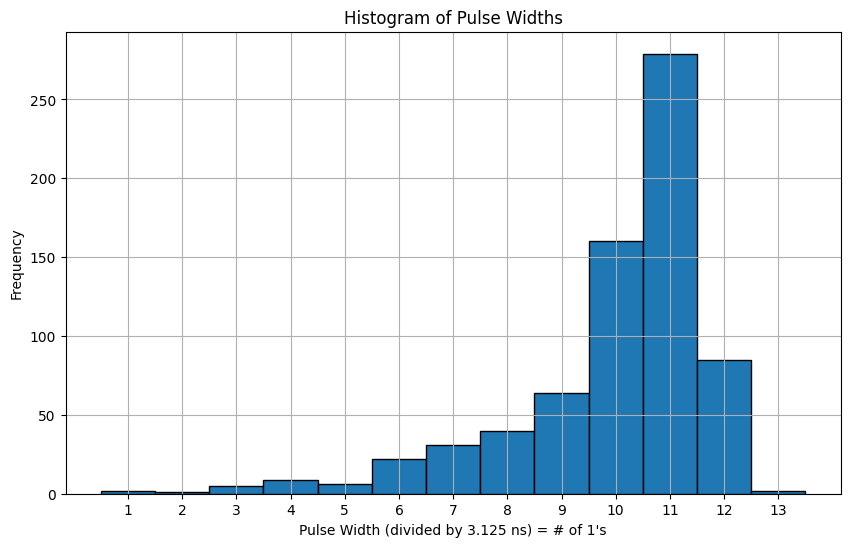

In [16]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
#plt.yscale('log')
plt.show()

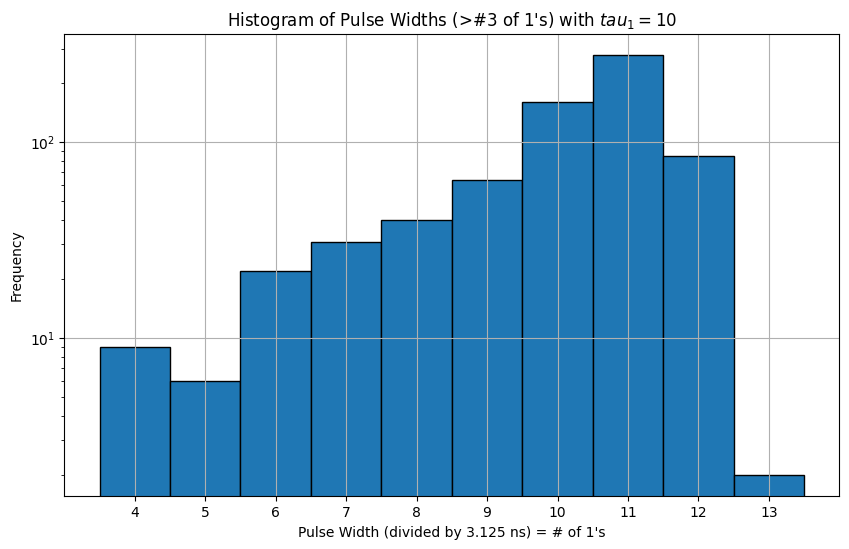

In [17]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s) with $tau_{1} = 10$')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

## Otra tanda más de archivos

In [4]:
# Read and process all dataframes
dfs = []
for i in range(1, 11):
    df = pd.read_csv(f"C:/Users/Usuario/OneDrive/Desktop/ITeDA/Hist Presentacion/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.02  # 50 mV threshold (a bit lower for accuracy)
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

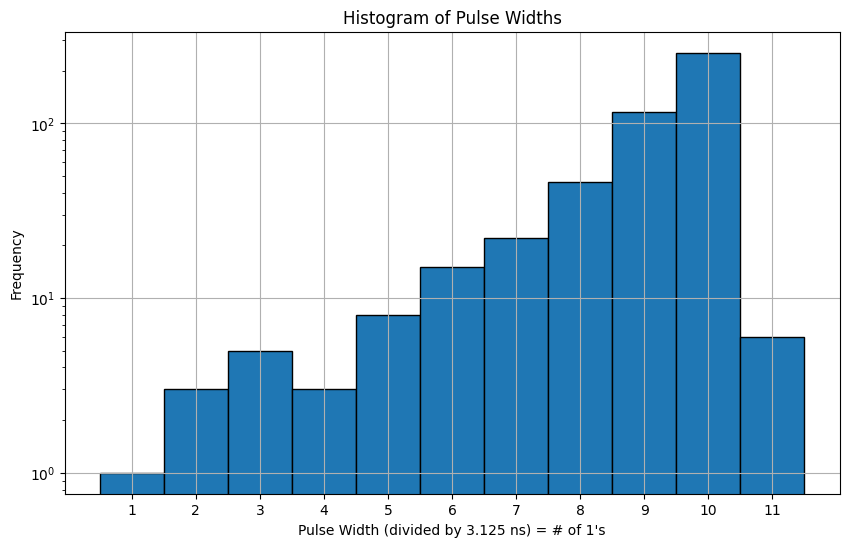

Mean (valor medio): 9.05020920502092
Standard Deviation (sigma): 1.545124867966667


In [5]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

# Calculate mean and standard deviation
mean_value = all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'].mean()
std_dev_value = all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'].std()

print(f"Mean (valor medio): {mean_value}")
print(f"Standard Deviation (sigma): {std_dev_value}")


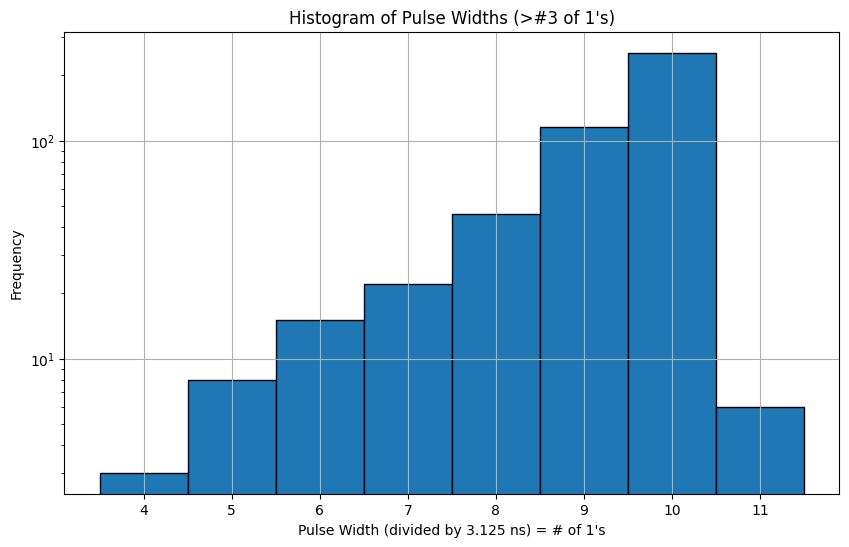

In [6]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.savefig('hist_presenta.png', dpi=1000)

In [7]:
import numpy as np

# Calculate mean and standard deviation
mean_value = filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'].mean()
std_dev_value = filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'].std()

print(f"Mean (valor medio): {mean_value}")
print(f"Standard Deviation (sigma): {std_dev_value}")


Mean (valor medio): 9.176972281449894
Standard Deviation (sigma): 1.2526137635692143


# Análisis de datos de la simulacion sampleada de la curva

### 1.000 muones - Sept - electronica completa - threshold a 2.5PE

In [13]:
df_muones = pd.read_csv(r"C:\Users\smili\OneDrive\Documents\GitHub\Laboratorio_6_7_ITeDA\LTSpice\Agosto - Version nueva de las simulaciones\1000_mu_full_circuit_2,5PE_thresh.txt", sep="	")
df_muones

,time,V(input_bode),V(out),V(out_fs),V(out_preamp)
0,0.000000e+00,0.000000,9.999999e-08,0.000000e+00,0.000000e+00
1,5.151717e-10,0.000007,9.999999e-08,2.139647e-10,-4.441933e-08
2,5.541847e-10,0.000030,9.999999e-08,4.777740e-09,-3.951589e-07
3,5.925404e-10,0.000105,9.999999e-08,-3.396523e-07,-2.186212e-06
4,6.308960e-10,0.000176,9.999999e-08,-2.083815e-07,-5.278878e-06
...,...,...,...,...,...
2659396,1.190255e-03,0.000009,9.999999e-08,3.129020e-10,-8.739927e-05
2659397,1.192264e-03,0.000009,9.999999e-08,4.227384e-10,-8.739927e-05
2659398,1.194273e-03,0.000009,9.999999e-08,4.857839e-10,-8.739927e-05
2659399,1.198960e-03,0.000009,9.999999e-08,-1.414079e-08,-8.739927e-05


In [14]:
pulse_widths = []
threshold = 0.8  # 1V threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in tqdm(df_muones.iterrows(), total=len(df_muones), desc="Processing pulses"):
    if row['V(out)'] > threshold and (pulse_start_time is None or df_muones['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_muones['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_muones = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_muones)

Processing pulses: 100%|██████████████████████████████████████████████████| 2659401/2659401 [03:38<00:00, 12186.17it/s]

     Pulse Width (divided by 3.125 ns)
0                                 13.0
1                                 13.0
2                                 13.0
3                                 13.0
4                                 13.0
..                                 ...
995                               11.0
996                               11.0
997                               11.0
998                               12.0
999                               11.0

[1000 rows x 1 columns]


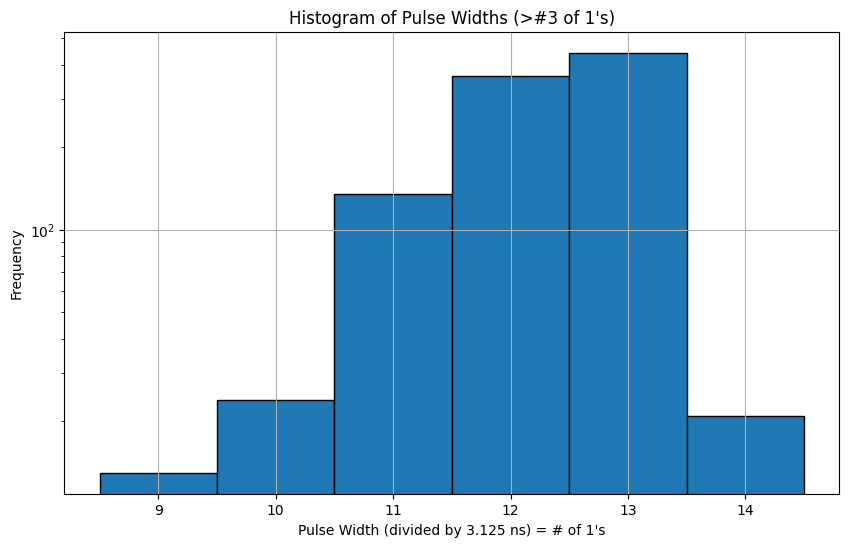

In [15]:
# Filter data to keep only values greater than 3
filtered_pulse_widths_df_muones = pulse_widths_df_muones[pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

In [16]:
# Calculate mean and standard deviation
mean_value = filtered_pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)'].mean()
std_dev_value = filtered_pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)'].std()

print(f"Mean (valor medio): {mean_value}")
print(f"Standard Deviation (sigma): {std_dev_value}")


Mean (valor medio): 12.262
Standard Deviation (sigma): 0.8978653363184047


### 1.000 muones - Sept - electronica completa - threshold a 3PE

In [9]:
df_muones_3PE = pd.read_csv(r"C:\Users\smili\OneDrive\Documents\GitHub\Laboratorio_6_7_ITeDA\LTSpice\Agosto - Version nueva de las simulaciones\1000_mu_full_circuit_3PE_thresh.txt", sep="	")
df_muones_3PE

,time,V(input_bode),V(out),V(out_fs),V(out_preamp)
0,0.000000e+00,0.000000,9.999999e-08,0.000000e+00,0.000000e+00
1,5.151717e-10,0.000007,9.999999e-08,2.139647e-10,-4.441933e-08
2,5.541847e-10,0.000030,9.999999e-08,4.777740e-09,-3.951589e-07
3,5.925404e-10,0.000105,9.999999e-08,-3.396523e-07,-2.186212e-06
4,6.308960e-10,0.000176,9.999999e-08,-2.083815e-07,-5.278878e-06
...,...,...,...,...,...
2660170,1.191092e-03,0.000009,9.999999e-08,-4.016786e-10,-8.739927e-05
2660171,1.193101e-03,0.000009,9.999999e-08,-3.986997e-10,-8.739927e-05
2660172,1.196616e-03,0.000009,9.999999e-08,6.444907e-10,-8.739927e-05
2660173,1.198960e-03,0.000009,9.999999e-08,-1.414079e-08,-8.739927e-05


In [10]:
pulse_widths_3PE = []
threshold = 0.8  # 1V threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in tqdm(df_muones_3PE.iterrows(), total=len(df_muones_3PE), desc="Processing pulses"):
    if row['V(out)'] > threshold and (pulse_start_time is None or df_muones_3PE['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_muones_3PE['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_3PE.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_muones_3PE = pd.DataFrame(np.floor(pulse_widths_3PE), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_muones_3PE)

Processing pulses: 100%|██████████████████████████████████████████████████| 2660175/2660175 [02:03<00:00, 21539.99it/s]

     Pulse Width (divided by 3.125 ns)
0                                 13.0
1                                 13.0
2                                 13.0
3                                 13.0
4                                 13.0
..                                 ...
995                               10.0
996                               11.0
997                               11.0
998                               11.0
999                               11.0

[1000 rows x 1 columns]


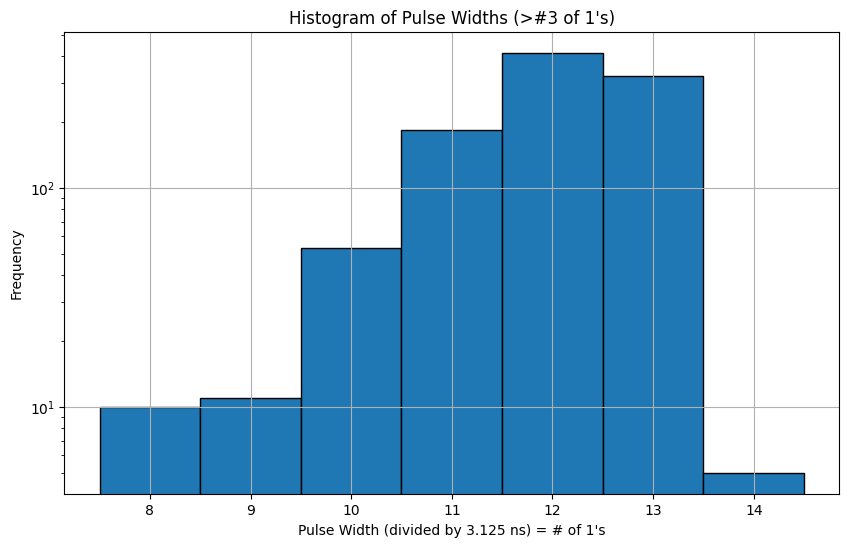

In [11]:
# Filter data to keep only values greater than 3
filtered_pulse_widths_df_muones_3PE = pulse_widths_df_muones_3PE[pulse_widths_df_muones_3PE['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df_muones_3PE['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df_muones_3PE['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df_muones_3PE['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df_muones_3PE['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df_muones_3PE['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

In [12]:
# Calculate mean and standard deviation
mean_value = filtered_pulse_widths_df_muones_3PE['Pulse Width (divided by 3.125 ns)'].mean()
std_dev_value = filtered_pulse_widths_df_muones_3PE['Pulse Width (divided by 3.125 ns)'].std()

print(f"Mean (valor medio): {mean_value}")
print(f"Standard Deviation (sigma): {std_dev_value}")


Mean (valor medio): 11.97
Standard Deviation (sigma): 0.9990485964647057


### 2.000 muones - Sept - electronica completa - threshold a 2.5PE

In [33]:
df_muones_2000 = pd.read_csv(r"C:\Users\smili\OneDrive\Documents\GitHub\Laboratorio_6_7_ITeDA\LTSpice\Agosto - Version nueva de las simulaciones\2000_mu_full_circuit_2,5PE_thresh.txt", sep="	")
df_muones_2000

,time,V(input_bode),V(out),V(out_fs),V(out_preamp)
0,0.000000e+00,0.000000,9.999999e-08,0.000000e+00,0.000000e+00
1,7.052351e-10,0.000009,9.999999e-08,5.757995e-11,-3.326238e-08
2,7.265279e-10,0.000046,9.999999e-08,-4.557891e-08,-3.939691e-07
3,7.478207e-10,0.000083,9.999999e-08,-3.761642e-08,-1.194905e-06
4,7.691135e-10,0.000120,9.999999e-08,2.394506e-08,-2.436070e-06
...,...,...,...,...,...
4953735,2.472666e-03,0.000010,9.999999e-08,2.121358e-10,-9.951702e-05
4953736,2.476851e-03,0.000010,9.999999e-08,6.318714e-10,-9.951702e-05
4953737,2.496382e-03,0.000010,9.999999e-08,5.280754e-10,-9.951702e-05
4953738,2.498824e-03,0.000010,9.999999e-08,-2.129601e-10,-9.951702e-05


In [34]:
pulse_widths_2000 = []
threshold = 0.8  # 1V threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in tqdm(df_muones_2000.iterrows(), total=len(df_muones_2000), desc="Processing pulses"):
    if row['V(out)'] > threshold and (pulse_start_time is None or df_muones_2000['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_muones_2000['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_2000.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_muones_2000 = pd.DataFrame(np.floor(pulse_widths_2000), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_muones_2000)

Processing pulses: 100%|██████████████████████████████████████████████████| 4953740/4953740 [03:42<00:00, 22300.63it/s]

      Pulse Width (divided by 3.125 ns)
0                                  14.0
1                                  14.0
2                                  13.0
3                                  13.0
4                                  13.0
...                                 ...
1995                               11.0
1996                                9.0
1997                               12.0
1998                               12.0
1999                               11.0

[2000 rows x 1 columns]


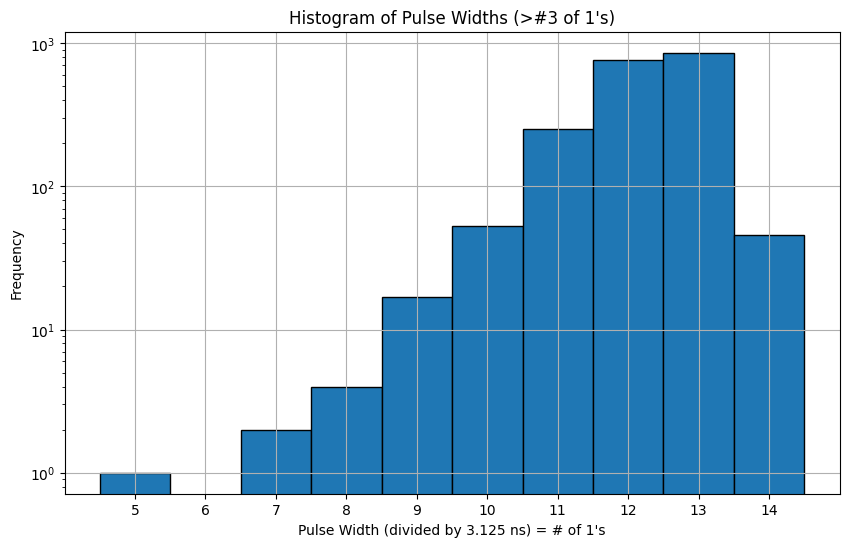

In [35]:
# Filter data to keep only values greater than 3
filtered_pulse_widths_df_muones_2000 = pulse_widths_df_muones_2000[pulse_widths_df_muones_2000['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df_muones_2000['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df_muones_2000['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df_muones_2000['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df_muones_2000['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df_muones_2000['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

### Test Numba

      Pulse Width (divided by 3.125 ns)
0                                   6.0
1                                   6.0
2                                   5.0
3                                   5.0
4                                   6.0
...                                 ...
1735                                5.0
1736                                5.0
1737                                5.0
1738                                5.0
1739                                5.0

[1740 rows x 1 columns]


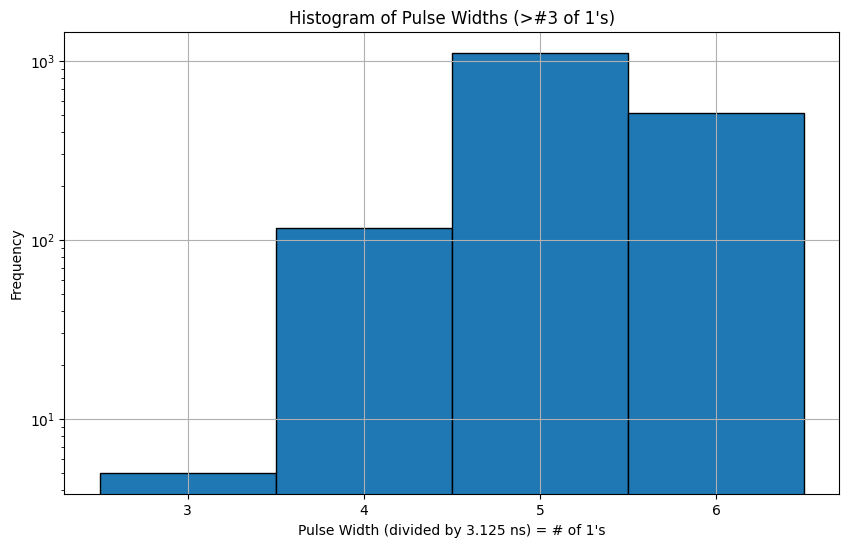

In [6]:
# Load data
df_muones_2000_update = pd.read_csv(r"C:\Users\smili\OneDrive\Documents\GitHub\Labo - Archivos Grandes para GitHub\LTSpice\Sept\1000_mu_corcuito_update.txt", sep="\t")

# Convert relevant columns to numpy arrays for fast processing
time_array = df_muones_2000_update['time'].values
vout_array = df_muones_2000_update['V(out)'].values

# Define threshold and time divisor
threshold = 0.1  # 200mV threshold
time_divisor = 3.125e-9

@njit
def compute_pulse_widths(time_array, vout_array, threshold, time_divisor):
    pulse_widths = []
    pulse_start_time = None

    for i in range(1, len(vout_array)):
        if vout_array[i] > threshold and (pulse_start_time is None or vout_array[i-1] <= threshold):
            # Rising edge detected
            pulse_start_time = time_array[i]
        elif vout_array[i] <= threshold and pulse_start_time is not None and vout_array[i-1] > threshold:
            # Falling edge detected
            pulse_end_time = time_array[i]
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / time_divisor
            pulse_widths.append(np.floor(width))  # Floor to nearest lower integer
            pulse_start_time = None

    return pulse_widths

# Call the numba-optimized function
pulse_widths_2000_update = compute_pulse_widths(time_array, vout_array, threshold, time_divisor)

# Convert to DataFrame
pulse_widths_df_muones_2000_update = pd.DataFrame(pulse_widths_2000_update, columns=['Pulse Width (divided by 3.125 ns)'])

# Display result
print(pulse_widths_df_muones_2000_update)


# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones_2000_update = pulse_widths_df_muones_2000_update[pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

### 2000 Muones - Sept - Electronica Update - threshold a 2.5PE

In [3]:
#df_muones_2000_update = pd.read_csv(r"C:\Users\Usuario\Documents\Labo_ITeDA_no_entra_en_git\Sims Grandes\2000_muons_full_chain_update.txt", sep="	")
df_muones_2000_update = pd.read_csv(r"C:\Users\smili\OneDrive\Documents\GitHub\Labo - Archivos Grandes para GitHub\LTSpice\Sept\1000_mu_corcuito_update.txt", sep="\t")
df_muones_2000_update

,time,V(input_bode),V(out),V(out_fs),V(out_preamp)
0,0.000000e+00,0.000000,2.000000e-08,0.000000e+00,0.000000
1,7.002334e-10,0.000000,2.000000e-08,0.000000e+00,0.000000
2,7.152384e-10,0.000026,2.000000e-08,1.226248e-08,-0.000001
3,7.352451e-10,0.000061,2.000000e-08,8.738240e-08,-0.000006
4,7.542514e-10,0.000094,2.000000e-08,2.645544e-07,-0.000012
...,...,...,...,...,...
3074322,1.999998e-03,0.000017,2.000000e-08,-1.274791e-03,-0.000188
3074323,1.999999e-03,0.000016,2.000000e-08,-1.219545e-03,-0.000180
3074324,2.000000e-03,0.000015,2.000000e-08,-1.166714e-03,-0.000172
3074325,2.000000e-03,0.000015,2.000000e-08,-1.165521e-03,-0.000172


In [4]:
pulse_widths_2000_update = []
threshold = 0.1  # 200mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in tqdm(df_muones_2000_update.iterrows(), total=len(df_muones_2000_update), desc="Processing pulses"):
    if row['V(out)'] > threshold and (pulse_start_time is None or df_muones_2000_update['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_muones_2000_update['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_2000_update.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_muones_2000_update = pd.DataFrame(np.floor(pulse_widths_2000_update), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_muones_2000_update)

Processing pulses: 100%|██████████████████████████████████████████████████| 3074327/3074327 [02:39<00:00, 19306.79it/s]

      Pulse Width (divided by 3.125 ns)
0                                   6.0
1                                   6.0
2                                   5.0
3                                   5.0
4                                   6.0
...                                 ...
1735                                5.0
1736                                5.0
1737                                5.0
1738                                5.0
1739                                5.0

[1740 rows x 1 columns]


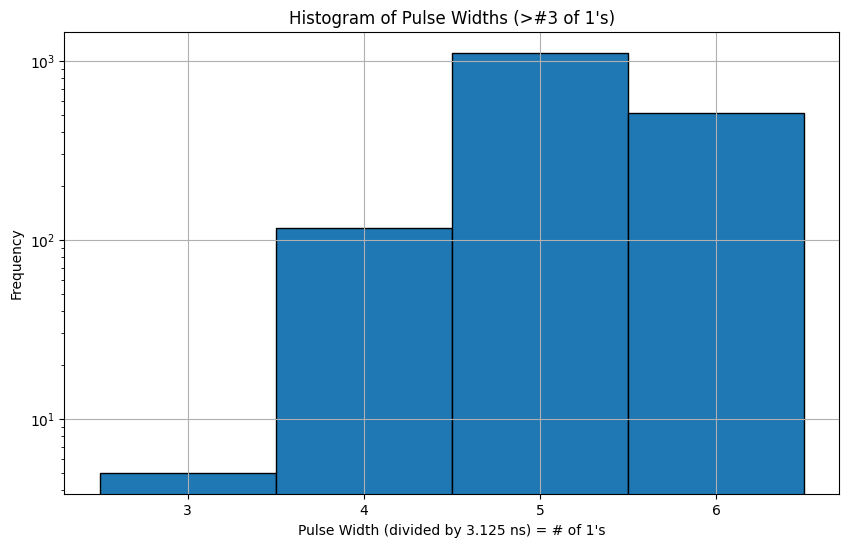

In [7]:
# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones_2000_update = pulse_widths_df_muones_2000_update[pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

### 10.000 muones - Agosto - electronica completa - theshold 2.5PE

In [11]:
df_muones_10000 = pd.read_csv("C:/Users/Usuario/Documents/Laboratorio_6_7_ITeDA/LTSpice/Agosto - Version nueva de las simulaciones/10000_muons_full_chain.txt", sep="	")
df_muones_10000

,time,V(input_bode),V(out),V(out_fs),V(out_preamp)
0,0.000000e+00,0.000000,9.999999e-08,0.000000e+00,0.000000e+00
1,5.051684e-10,0.000004,9.999999e-08,2.922229e-11,-1.688093e-08
2,5.276044e-10,0.000028,9.999999e-08,-3.922938e-08,-1.047700e-07
3,5.500405e-10,0.000054,9.999999e-08,-3.706139e-08,-5.911686e-07
4,5.724765e-10,0.000081,9.999999e-08,6.533200e-09,-1.476077e-06
...,...,...,...,...,...
24020076,1.188733e-02,0.000008,9.999999e-08,9.296643e-12,-8.490602e-05
24020077,1.190909e-02,0.000008,9.999999e-08,1.364242e-11,-8.490602e-05
24020078,1.194425e-02,0.000008,9.999999e-08,-1.432454e-11,-8.490602e-05
24020079,1.199112e-02,0.000008,9.999999e-08,9.321958e-09,-8.490602e-05


In [12]:
pulse_widths_1000 = []
threshold = 0.8  # 1V threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in tqdm(df_muones_10000.iterrows(), total=len(df_muones_1000000), desc="Processing pulses"):
    if row['V(out)'] > threshold and (pulse_start_time is None or df_muones_10000['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_muones_10000['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_1000.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_muones_10000 = pd.DataFrame(np.floor(pulse_widths_1000), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_muones_10000)

      Pulse Width (divided by 3.125 ns)
0                                  13.0
1                                  13.0
2                                  13.0
3                                  13.0
4                                  13.0
...                                 ...
9993                               11.0
9994                               11.0
9995                               10.0
9996                               10.0
9997                               11.0

[9998 rows x 1 columns]


In [15]:
pulse_widths_df_muones_10000

,Pulse Width (divided by 3.125 ns)
0,13.0
1,13.0
2,13.0
3,13.0
4,13.0
...,...
9993,11.0
9994,11.0
9995,10.0
9996,10.0


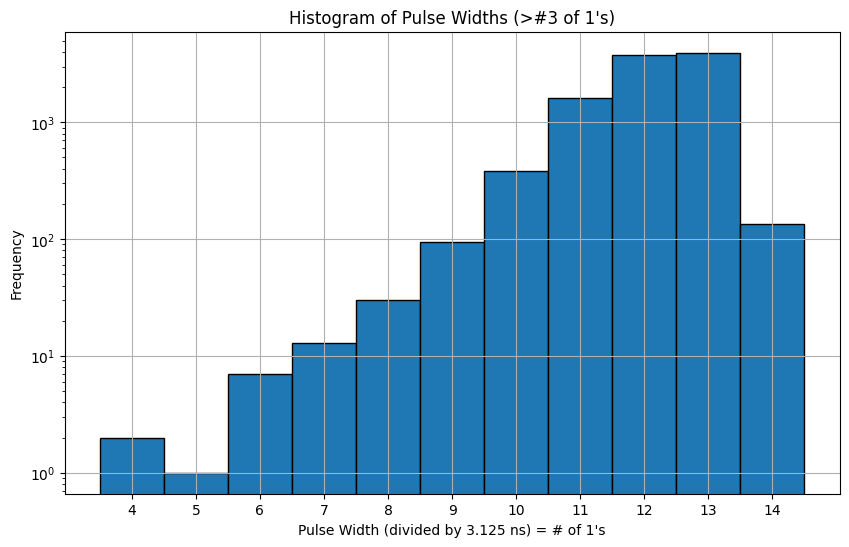

In [18]:
# Filter data to keep only values greater than 3
filtered_pulse_widths_df_muones_10000 = pulse_widths_df_muones_10000[pulse_widths_df_muones_10000['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df_muones_10000['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df_muones_10000['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df_muones_10000['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df_muones_10000['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df_muones_10000['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.savefig('hist_unos_final.pdf', dpi=1000)
plt.show()

In [19]:
# Calculate mean and standard deviation
mean_value = filtered_pulse_widths_df_muones_10000['Pulse Width (divided by 3.125 ns)'].mean()
std_dev_value = filtered_pulse_widths_df_muones_10000['Pulse Width (divided by 3.125 ns)'].std()

print(f"Mean (valor medio): {mean_value}")
print(f"Standard Deviation (sigma): {std_dev_value}")


Mean (valor medio): 12.130465232616308
Standard Deviation (sigma): 0.9767086103298818


### 1.000 muones - test solo PreAmp - theshold 2.5PE

In [3]:
df_muones_solo_preamp = pd.read_csv(r"C:\Users\smili\OneDrive\Documents\GitHub\Laboratorio_6_7_ITeDA\LTSpice\Septiembre - Analisis de fuente de problemas\1000_mu_solo_preamp_2,5PE.txt", sep="	")
df_muones_solo_preamp

,time,V(input_bode),V(out),V(out_preamp)
0,0.000000e+00,0.000000,9.999999e-09,0.000000e+00
1,5.151717e-10,-0.000007,9.999999e-09,4.441933e-08
2,5.541847e-10,-0.000030,9.999999e-09,3.951589e-07
3,6.469585e-10,-0.000195,9.999999e-09,9.798364e-06
4,7.397323e-10,-0.000338,9.999999e-09,2.425408e-05
...,...,...,...,...
5684957,1.192281e-03,-0.000009,9.999999e-09,8.739928e-05
5684958,1.195127e-03,-0.000009,9.999999e-09,8.739928e-05
5684959,1.197973e-03,-0.000009,9.999999e-09,8.739928e-05
5684960,1.199145e-03,-0.000009,9.999999e-09,8.739938e-05


In [7]:
pulse_widths_solo_preamp = []
threshold = 0.08  # 100mV threshold (set lower for accuracy)
pulse_start_time = None

# Use tqdm to show progress in the loop
for index, row in tqdm(df_muones_solo_preamp.iterrows(), total=len(df_muones_solo_preamp), desc="Processing pulses"):
    if row['V(out)'] > threshold and (pulse_start_time is None or df_muones_solo_preamp['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_muones_solo_preamp['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_solo_preamp.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_muones_solo_preamp = pd.DataFrame(np.floor(pulse_widths_solo_preamp), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_muones_solo_preamp)

Processing pulses: 100%|██████████████████████████████████████████████████| 5684962/5684962 [04:45<00:00, 19904.48it/s]

     Pulse Width (divided by 3.125 ns)
0                                 34.0
1                                 37.0
2                                 36.0
3                                 34.0
4                                 34.0
..                                 ...
995                               23.0
996                               24.0
997                               24.0
998                               26.0
999                               25.0

[1000 rows x 1 columns]


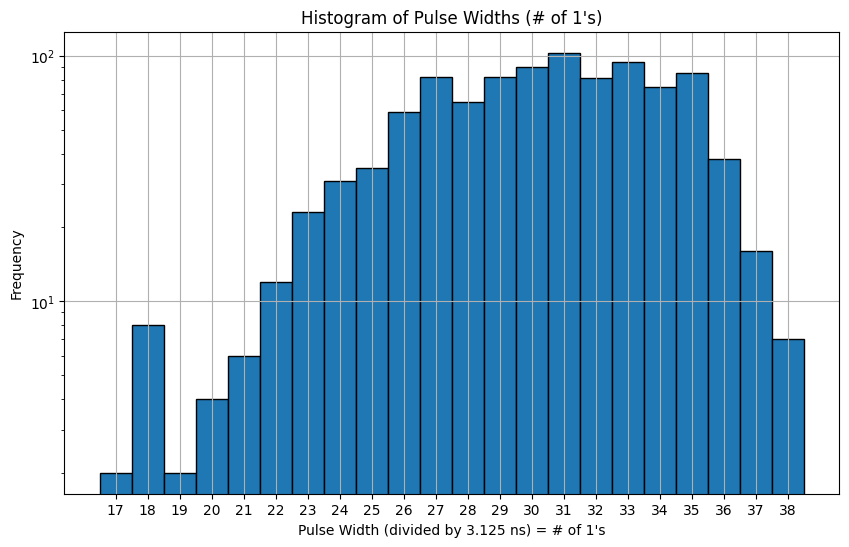

In [5]:
# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones = pulse_widths_df_muones[pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_solo_preamp['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_solo_preamp['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_solo_preamp['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (# of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_solo_preamp['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_solo_preamp['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

### 1.000 muones - test solo PreAmp - theshold 3PE

In [17]:
df_muones_solo_preamp_3PE = pd.read_csv(r"C:\Users\smili\OneDrive\Documents\GitHub\Laboratorio_6_7_ITeDA\LTSpice\Septiembre - Analisis de fuente de problemas\1000_mu_solo_preamp_3PE.txt", sep="	")
df_muones_solo_preamp_3PE

,time,V(input_bode),V(out),V(out_preamp)
0,0.000000e+00,0.000000,9.999999e-09,0.000000e+00
1,5.151717e-10,-0.000007,9.999999e-09,4.441933e-08
2,5.541847e-10,-0.000030,9.999999e-09,3.951589e-07
3,6.469585e-10,-0.000195,9.999999e-09,9.798364e-06
4,7.397323e-10,-0.000338,9.999999e-09,2.425408e-05
...,...,...,...,...
5684745,1.192281e-03,-0.000009,9.999999e-09,8.739928e-05
5684746,1.195127e-03,-0.000009,9.999999e-09,8.739928e-05
5684747,1.197973e-03,-0.000009,9.999999e-09,8.739928e-05
5684748,1.199145e-03,-0.000009,9.999999e-09,8.739938e-05


In [18]:
pulse_widths_solo_preamp_3PE = []
threshold = 0.08  # 100mV threshold (set lower for accuracy)
pulse_start_time = None

# Use tqdm to show progress in the loop
for index, row in tqdm(df_muones_solo_preamp_3PE.iterrows(), total=len(df_muones_solo_preamp_3PE), desc="Processing pulses"):
    if row['V(out)'] > threshold and (pulse_start_time is None or df_muones_solo_preamp_3PE['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_muones_solo_preamp_3PE['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_solo_preamp_3PE.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_muones_solo_preamp_3PE = pd.DataFrame(np.floor(pulse_widths_solo_preamp_3PE), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_muones_solo_preamp_3PE)

Processing pulses: 100%|██████████████████████████████████████████████████| 5684750/5684750 [04:48<00:00, 19736.72it/s]

     Pulse Width (divided by 3.125 ns)
0                                 32.0
1                                 36.0
2                                 34.0
3                                 32.0
4                                 33.0
..                                 ...
995                               22.0
996                               22.0
997                               22.0
998                               24.0
999                               24.0

[1000 rows x 1 columns]


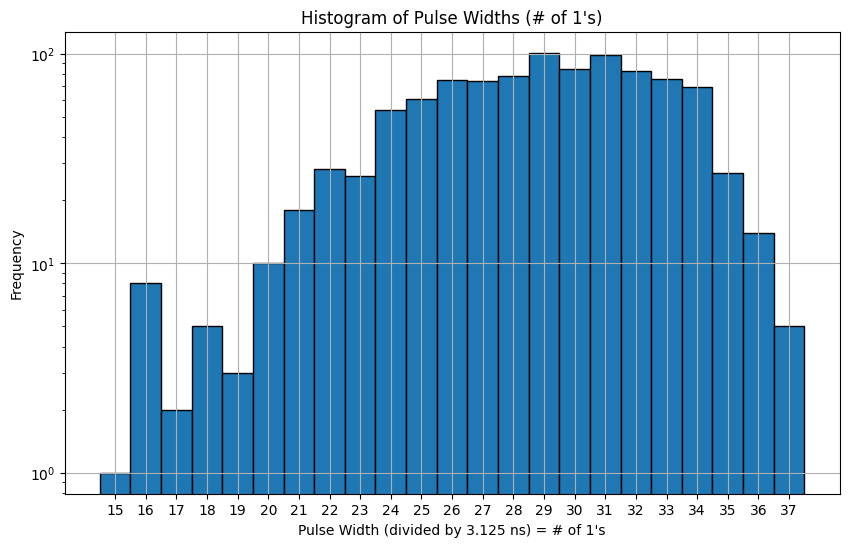

In [24]:
# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones = pulse_widths_df_muones[pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_solo_preamp_3PE['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_solo_preamp_3PE['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_solo_preamp_3PE['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (# of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_solo_preamp_3PE['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_solo_preamp_3PE['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

### 1.000 muones - test solo PreAmp - theshold 10PE

In [27]:
df_muones_solo_preamp_10PE = pd.read_csv(r"C:\Users\smili\OneDrive\Documents\GitHub\Laboratorio_6_7_ITeDA\LTSpice\Septiembre - Analisis de fuente de problemas\1000_mu_solo_preamp_10PE.txt", sep="	")
df_muones_solo_preamp_10PE

,time,V(input_bode),V(out),V(out_preamp)
0,0.000000e+00,0.000000,9.999999e-09,0.000000e+00
1,5.151717e-10,-0.000007,9.999999e-09,4.441933e-08
2,5.541847e-10,-0.000030,9.999999e-09,3.951589e-07
3,6.469585e-10,-0.000195,9.999999e-09,9.798364e-06
4,7.397323e-10,-0.000338,9.999999e-09,2.425408e-05
...,...,...,...,...
5683600,1.192281e-03,-0.000009,9.999999e-09,8.739928e-05
5683601,1.195127e-03,-0.000009,9.999999e-09,8.739928e-05
5683602,1.197973e-03,-0.000009,9.999999e-09,8.739928e-05
5683603,1.199145e-03,-0.000009,9.999999e-09,8.739938e-05


In [28]:
pulse_widths_solo_preamp_10PE = []
threshold = 0.08  # 100mV threshold (set lower for accuracy)
pulse_start_time = None

# Use tqdm to show progress in the loop
for index, row in tqdm(df_muones_solo_preamp_10PE.iterrows(), total=len(df_muones_solo_preamp_10PE), desc="Processing pulses"):
    if row['V(out)'] > threshold and (pulse_start_time is None or df_muones_solo_preamp_10PE['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_muones_solo_preamp_10PE['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_solo_preamp_10PE.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_muones_solo_preamp_10PE = pd.DataFrame(np.floor(pulse_widths_solo_preamp_10PE), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_muones_solo_preamp_10PE)

Processing pulses: 100%|██████████████████████████████████████████████████| 5683605/5683605 [06:33<00:00, 14457.21it/s]

     Pulse Width (divided by 3.125 ns)
0                                 21.0
1                                 26.0
2                                 24.0
3                                 21.0
4                                 22.0
..                                 ...
957                                6.0
958                                1.0
959                                4.0
960                               10.0
961                                9.0

[962 rows x 1 columns]


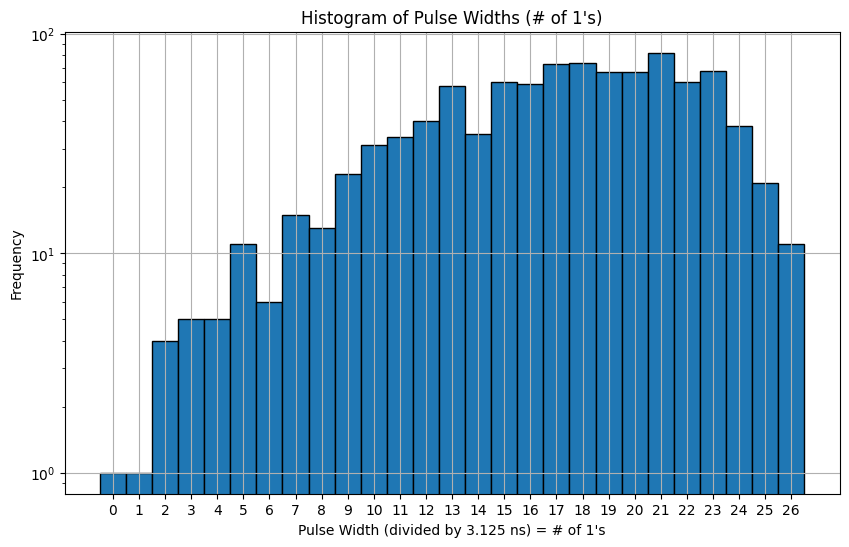

In [29]:
# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones = pulse_widths_df_muones[pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_solo_preamp_10PE['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_solo_preamp_10PE['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_solo_preamp_10PE['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (# of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_solo_preamp_10PE['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_solo_preamp_10PE['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

### Comparacion de solo PreAmp con distintos thresholds

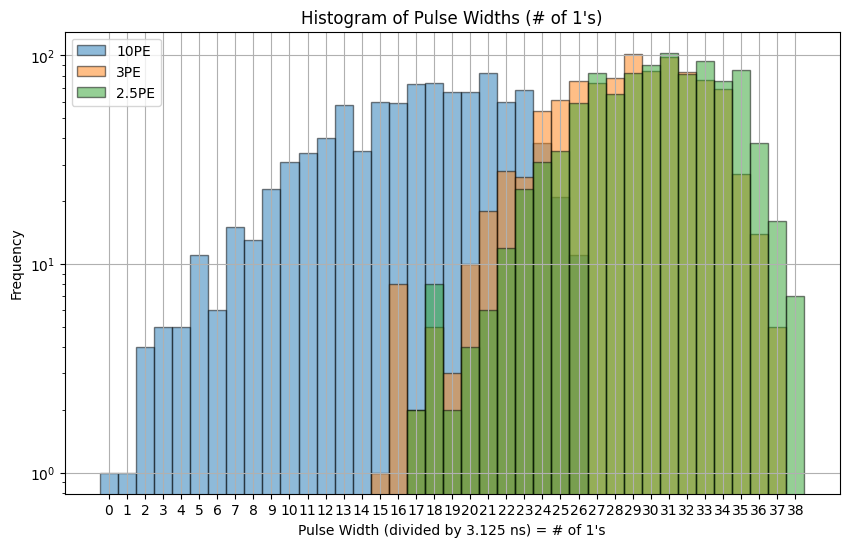

In [31]:
# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones = pulse_widths_df_muones[pulse_widths_df_muones['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_solo_preamp_10PE['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_solo_preamp['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5


plt.hist(pulse_widths_df_muones_solo_preamp_10PE['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black', alpha=0.5, label='10PE')
plt.hist(pulse_widths_df_muones_solo_preamp_3PE['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black', alpha=0.5, label='3PE')
plt.hist(pulse_widths_df_muones_solo_preamp['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black', alpha=0.5, label='2.5PE')



plt.xticks(np.arange(np.min(pulse_widths_df_muones_solo_preamp_10PE['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_solo_preamp['Pulse Width (divided by 3.125 ns)']) + 1))


plt.title('Histogram of Pulse Widths (# of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.yscale('log')
plt.legend()
plt.show()


# ANALISIS DE DATOS DE LA MOTIVACION

## Datos Reales

In [11]:
# Load the data, skipping bad lines and handling non-numeric data
data_real = pd.read_csv(
    r'C:\Users\Usuario\Documents\Labo_ITeDA_no_entra_en_git\6-ones_norm_sec_theta_all_data.dat', 
    sep=' ', 
    header=None, 
    skiprows=1,  # Skip the first row if it’s not data
    names=['ones', 'ones_normalized', 'sec_theta'],
    dtype=str,  # Read everything as strings initially to inspect
    on_bad_lines='skip'  # Skip lines with errors
)

# Convert columns to numeric, forcing errors to NaN
data_real['ones'] = pd.to_numeric(data_real['ones'], errors='coerce')

print(data_real['ones'])

# Print the unique values in the 'ones' column
unique_values_real = data_real['ones'].unique()
print("Unique values in the 'ones' column:", unique_values_real)

0           8
1           7
2           6
3           8
4           7
           ..
5226891     7
5226892     8
5226893    11
5226894    11
5226895     7
Name: ones, Length: 5226896, dtype: int64
Unique values in the 'ones' column: [   8    7    6    9   11   10    5    4   14   12   13   15   17   18
  116   16   19   21   68   69   75   70   71   74   24   72   73   67
   57   32   44   26   27   20   56   36   35   29   51   42   43   66
   59   63   64   52   60   55   54  515  261   30   61   65 1537   40
   38   39   37 1026 1142 1526   48   33   34   28 1029 1027   49   58
   31   46   45   77  517  259 1532   47   41   50   23   76   22   62
   25 1333]


In [12]:
# Print the unique values in the 'ones' column, sorted in ascending order
unique_values_sorted_real = np.sort(unique_values_real)
print("Sorted unique values in the 'ones' column:", unique_values_sorted_real)


Sorted unique values in the 'ones' column: [   4    5    6    7    8    9   10   11   12   13   14   15   16   17
   18   19   20   21   22   23   24   25   26   27   28   29   30   31
   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   54   55   56   57   58   59   60
   61   62   63   64   65   66   67   68   69   70   71   72   73   74
   75   76   77  116  259  261  515  517 1026 1027 1029 1142 1333 1526
 1532 1537]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


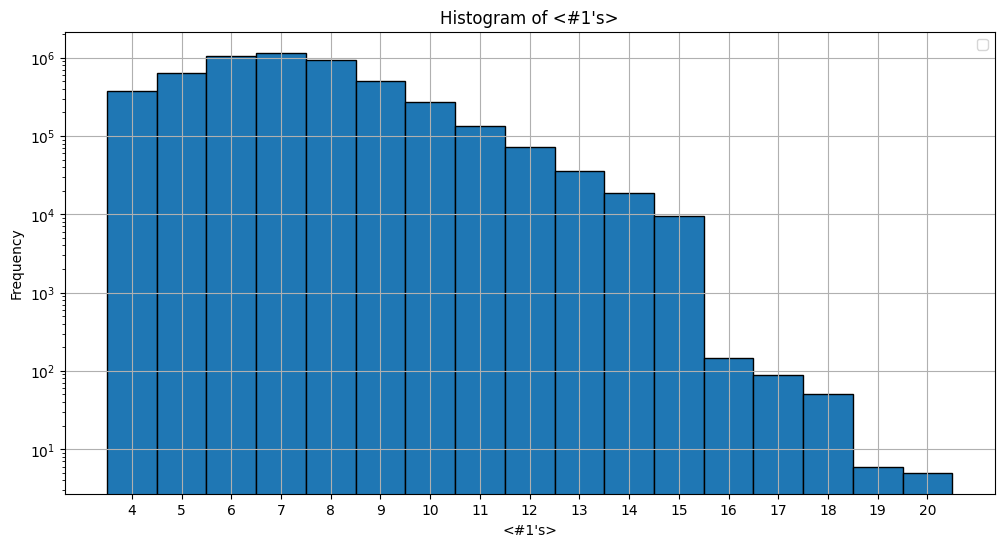

In [13]:
# Filter the data to keep only values <= 20
filtered_data_real = data_real[data_real['ones'] <= 20]

# Now you can proceed with the histogram plotting
plt.figure(figsize=(12, 6))

# Define the bin edges for the histogram
bin_edges_real = np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 2) - 0.5

# Plot the histogram
plt.hist(filtered_data_real['ones'], bins=bin_edges_real, edgecolor='black', log=True)

# Customize the plot
plt.title('Histogram of <#1\'s>')
plt.xlabel('<#1\'s>')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 1))
plt.legend()

# Save and show the plot
#plt.savefig('hist_presenta.png', dpi=1000)
plt.show()


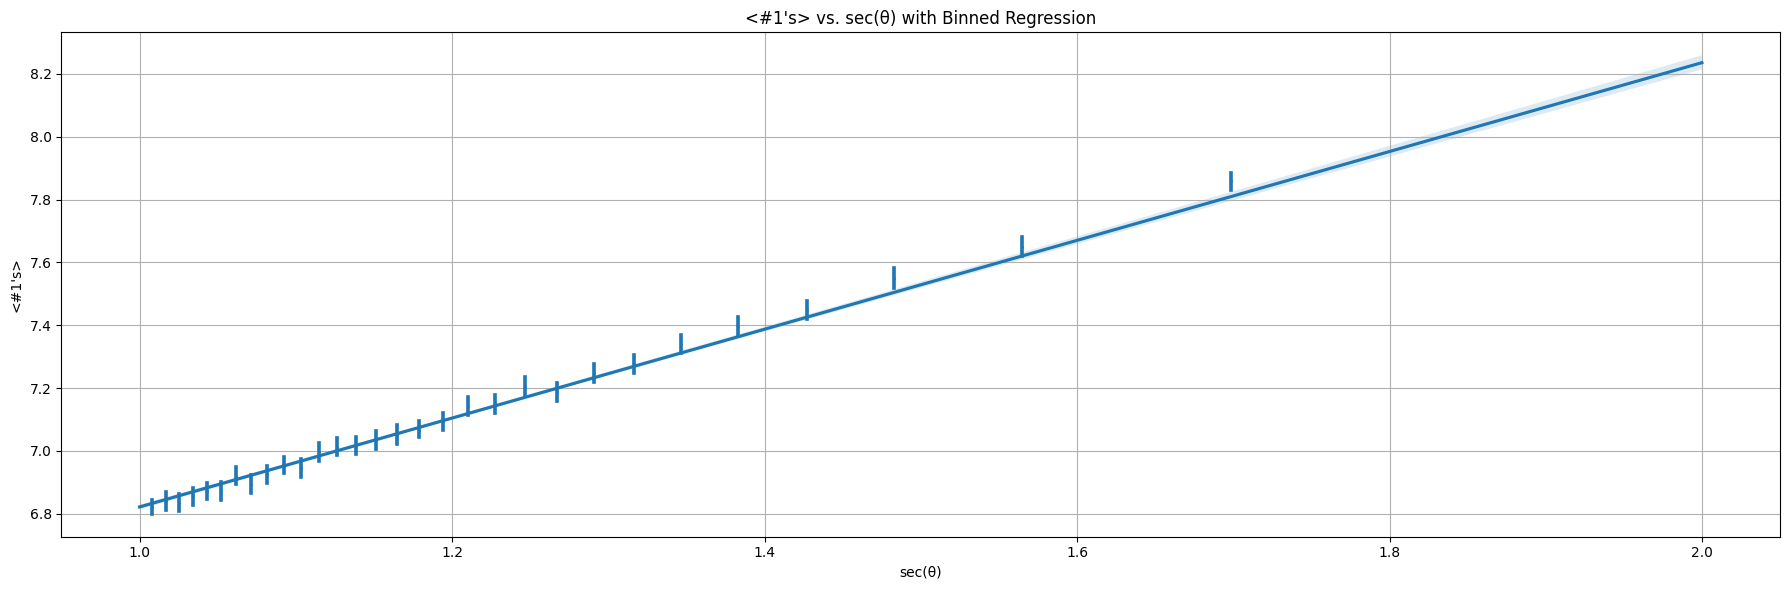

In [14]:
# Assuming filtered_data_real contains your filtered data
# Randomly sample 1% of the data for faster plotting
sampled_data_real = filtered_data_real.sample(frac=0.1, random_state=1)

# Convert the columns to numeric, forcing errors to NaN
sampled_data_real['sec_theta'] = pd.to_numeric(sampled_data_real['sec_theta'], errors='coerce')
sampled_data_real['ones'] = pd.to_numeric(sampled_data_real['ones'], errors='coerce')

# Drop rows with NaN values in either column after conversion
sampled_data_real.dropna(subset=['sec_theta', 'ones'], inplace=True)

# Set up the plot size and layout
plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

x = sampled_data_real['sec_theta']
y = sampled_data_real['ones']

# Create the regplot with binning along the x-axis
sns.regplot(x=x, y=y, x_bins=30, marker='o', fit_reg=True, scatter_kws={'s': 1})

# Customize the plot
plt.title('<#1\'s> vs. sec(θ) with Binned Regression')
plt.xlabel('sec(θ)')
plt.ylabel('<#1\'s>')
plt.grid(True)

# Show the plot
plt.show()


## Datos Simluados

In [15]:
# Load the data, skipping bad lines and handling non-numeric data
data_sim = pd.read_csv(
    r'C:\Users\Usuario\Documents\Labo_ITeDA_no_entra_en_git\/6-ones_norm_sec_theta_all_sim.dat', 
    sep=' ', 
    header=None, 
    skiprows=1,  # Skip the first row if it’s not data
    names=['ones', 'ones_normalized', 'sec_theta'],
    dtype=str,  # Read everything as strings initially to inspect
    on_bad_lines='skip'  # Skip lines with errors
)

# Convert columns to numeric, forcing errors to NaN
data_sim['ones'] = pd.to_numeric(data_sim['ones'], errors='coerce')

print(data_sim['ones'])

# Print the unique values in the 'ones' column
unique_values_sim = data_sim['ones'].unique()
print("Unique values in the 'ones' column:", unique_values_sim)

0           8
1           9
2           9
3           6
4           7
           ..
1593620     8
1593621     7
1593622     8
1593623    11
1593624     7
Name: ones, Length: 1593625, dtype: int64
Unique values in the 'ones' column: [ 8  9  6  7  5 11 10  4 13 14 12 15 16 18 17]


In [16]:
# Print the unique values in the 'ones' column, sorted in ascending order
unique_values_sorted_sim = np.sort(unique_values_sim)
print("Sorted unique values in the 'ones' column:", unique_values_sorted_sim)


Sorted unique values in the 'ones' column: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


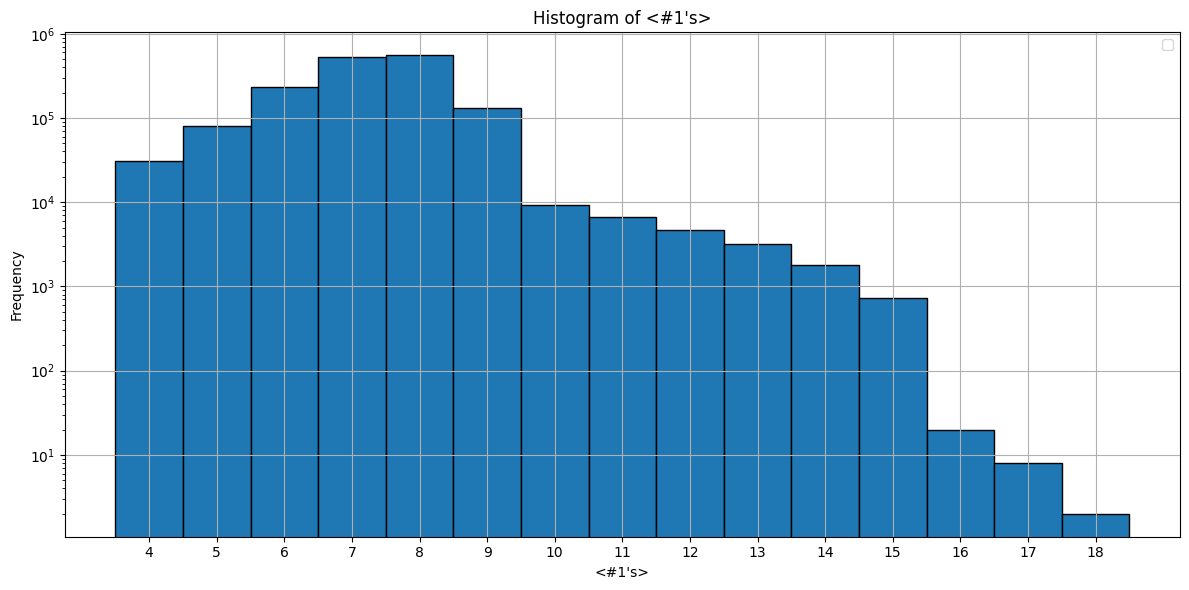

In [17]:
# Filter the data to keep only values <= 20
filtered_data_sim = data_sim[data_sim['ones'] <= 20]

# Now you can proceed with the histogram plotting
plt.figure(figsize=(12, 6))

# Define the bin edges for the histogram
bin_edges_sim = np.arange(np.min(filtered_data_sim['ones']), np.max(filtered_data_sim['ones']) + 2) - 0.5

# Plot the histogram
plt.hist(filtered_data_sim['ones'], bins=bin_edges_sim, edgecolor='black', log=True)

# Customize the plot
plt.title('Histogram of <#1\'s>')
plt.xlabel('<#1\'s>')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_data_sim['ones']), np.max(filtered_data_sim['ones']) + 1))
plt.legend()

# Save and show the plot
#plt.savefig('hist_presenta.png', dpi=1000)
plt.show()


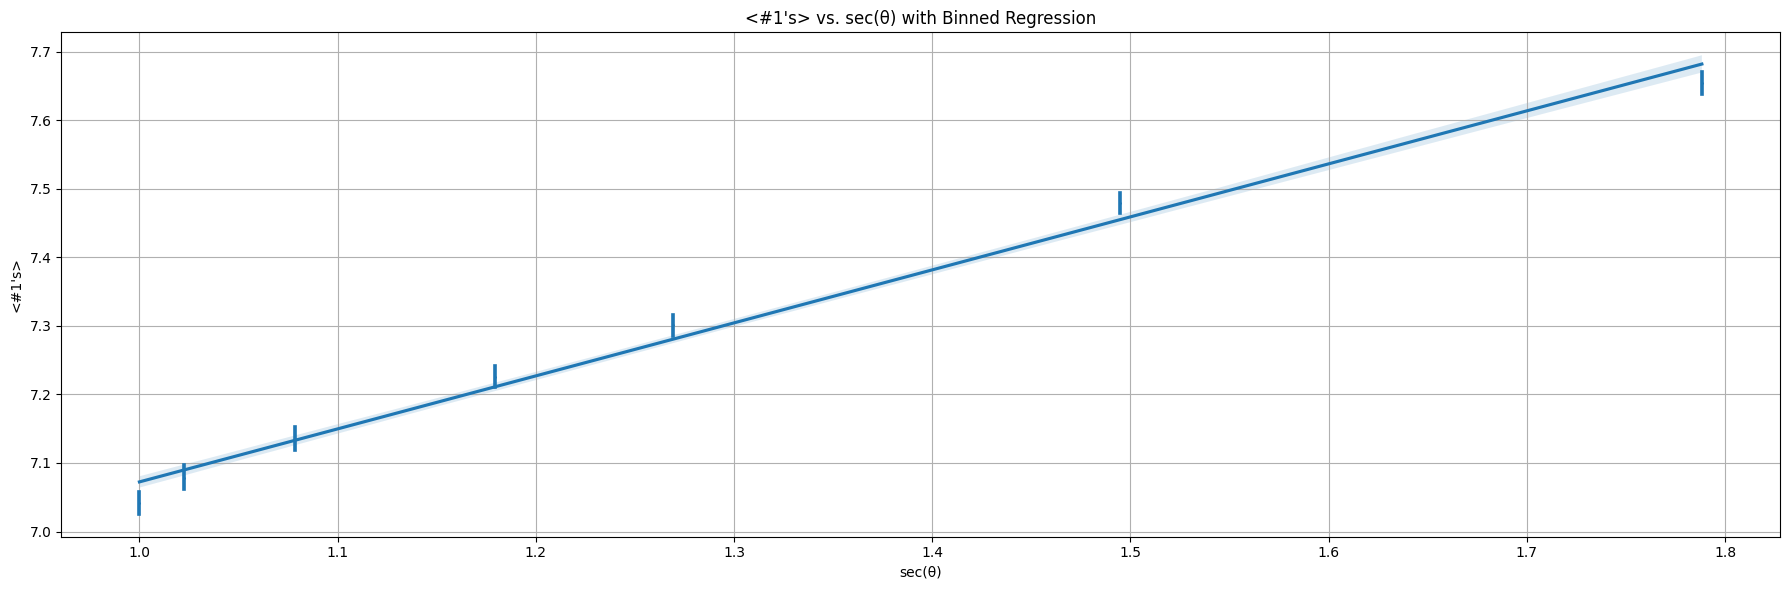

In [18]:
# Assuming filtered_data_real contains your filtered data
# Randomly sample 1% of the data for faster plotting
sampled_data_sim = filtered_data_sim.sample(frac=0.1, random_state=1)

# Convert the columns to numeric, forcing errors to NaN
sampled_data_sim['sec_theta'] = pd.to_numeric(sampled_data_sim['sec_theta'], errors='coerce')
sampled_data_sim['ones'] = pd.to_numeric(sampled_data_sim['ones'], errors='coerce')

# Drop rows with NaN values in either column after conversion
sampled_data_sim.dropna(subset=['sec_theta', 'ones'], inplace=True)

# Set up the plot size and layout
plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

x = sampled_data_sim['sec_theta']
y = sampled_data_sim['ones']

# Create the regplot with binning along the x-axis
sns.regplot(x=x, y=y, x_bins=7, marker='o', fit_reg=True, scatter_kws={'s': 1})

# Customize the plot
plt.title('<#1\'s> vs. sec(θ) with Binned Regression')
plt.xlabel('sec(θ)')
plt.ylabel('<#1\'s>')
plt.grid(True)

# Show the plot
plt.show()


## Datos uno arriba de otro

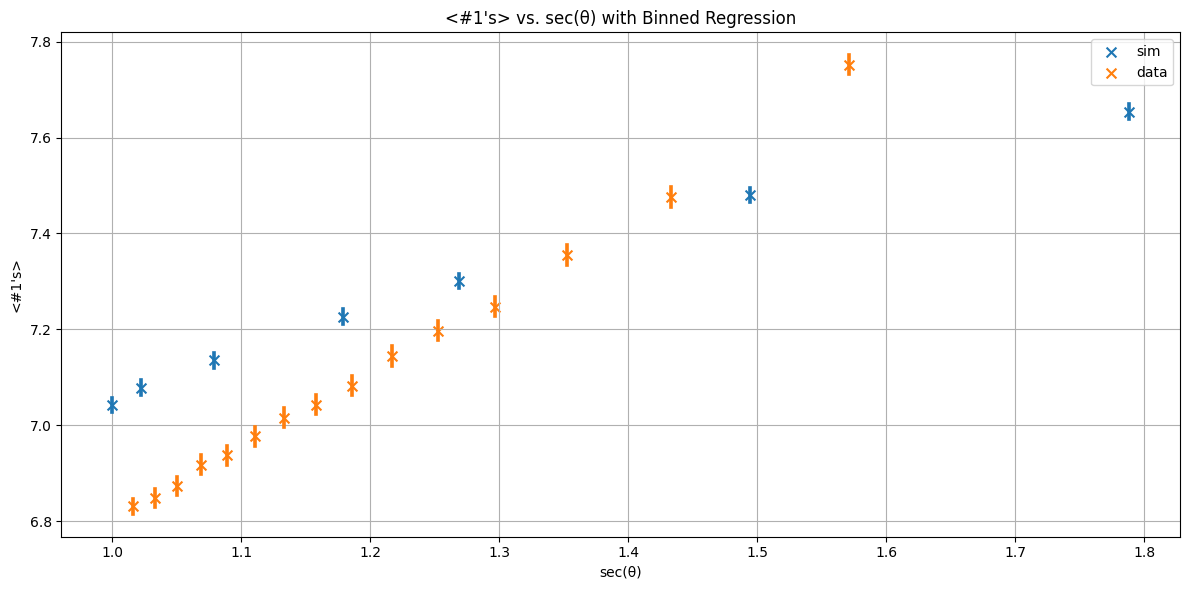

In [19]:
# ACA PUEDO CAMBIAR EL BINEADO


# Randomly sample 10% of the data for faster plotting
sampled_data_real = filtered_data_real.sample(frac=0.1, random_state=1)

# Convert the columns to numeric, forcing errors to NaN
sampled_data_real['sec_theta'] = pd.to_numeric(sampled_data_real['sec_theta'], errors='coerce')
sampled_data_real['ones'] = pd.to_numeric(sampled_data_real['ones'], errors='coerce')

x_real = sampled_data_real['sec_theta']
y_real = sampled_data_real['ones']

# Drop rows with NaN values in either column after conversion
sampled_data_real.dropna(subset=['sec_theta', 'ones'], inplace=True)





# Randomly sample 10% of the data for faster plotting
sampled_data_sim = filtered_data_sim.sample(frac=0.1, random_state=1)

# Convert the columns to numeric, forcing errors to NaN
sampled_data_sim['sec_theta'] = pd.to_numeric(sampled_data_sim['sec_theta'], errors='coerce')
sampled_data_sim['ones'] = pd.to_numeric(sampled_data_sim['ones'], errors='coerce')

x_sim = sampled_data_sim['sec_theta']
y_sim = sampled_data_sim['ones']

# Drop rows with NaN values in either column after conversion
sampled_data_sim.dropna(subset=['sec_theta', 'ones'], inplace=True)





# Set up the plot size and layout
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True


# Create the regplot with binning along the x-axis
sns.regplot(x=x_sim, y=y_sim, x_bins=7, marker='x', fit_reg=False, label='sim')

# Create the regplot with binning along the x-axis
sns.regplot(x=x_real, y=y_real, x_bins=15, marker='x', fit_reg=False, label='data')


# Customize the plot
plt.title('<#1\'s> vs. sec(θ) with Binned Regression')
plt.xlabel('sec(θ)')
plt.ylabel('<#1\'s>')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

[1.0, 1.0223405948650293, 1.078534742677583, 1.1791784033620965, 1.2690182150725788, 1.4944765498646086, 1.7882916499714008]


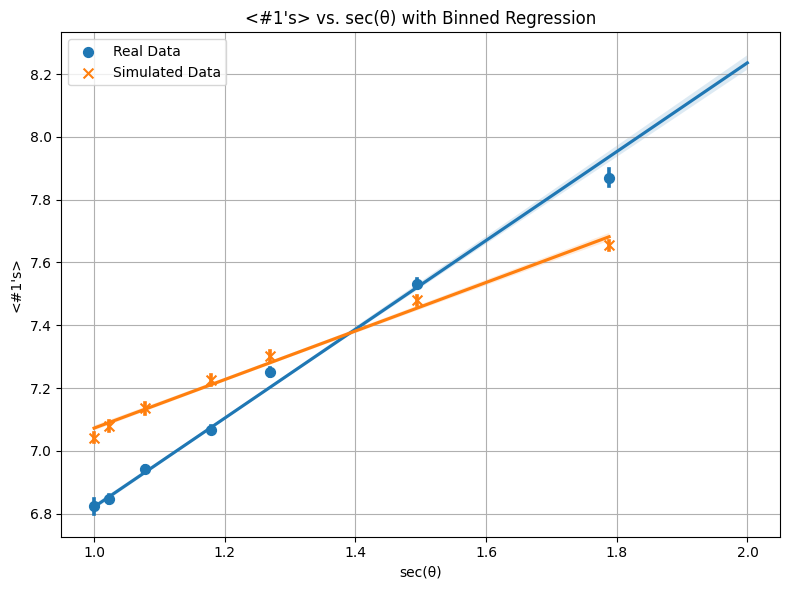

In [20]:
#ACA FIJO LOS BINES A LOS BINES DE LOS DATOS SIMULADOS

# Extract unique numeric bins from the simulated data
unique_bins = sorted(pd.to_numeric(filtered_data_sim['sec_theta'].unique(), errors='coerce'))
print(unique_bins)

# Set up the plot size and layout
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True

# Create the regplot for the real data with the same custom bins
sns.regplot(x=x_real, y=y_real, x_bins=unique_bins, marker='o', fit_reg=True, label='Real Data')

# Create the regplot for the simulated data with custom bins
sns.regplot(x=x_sim, y=y_sim, x_bins=unique_bins, marker='x', fit_reg=True, label='Simulated Data')


# Customize the plot
plt.title('<#1\'s> vs. sec(θ) with Binned Regression')
plt.xlabel('sec(θ)')
plt.ylabel('<#1\'s>')
plt.grid(True)
plt.legend()

# Show the plot
plt.savefig('#1s_angle.pdf', dpi=1000)
plt.show()


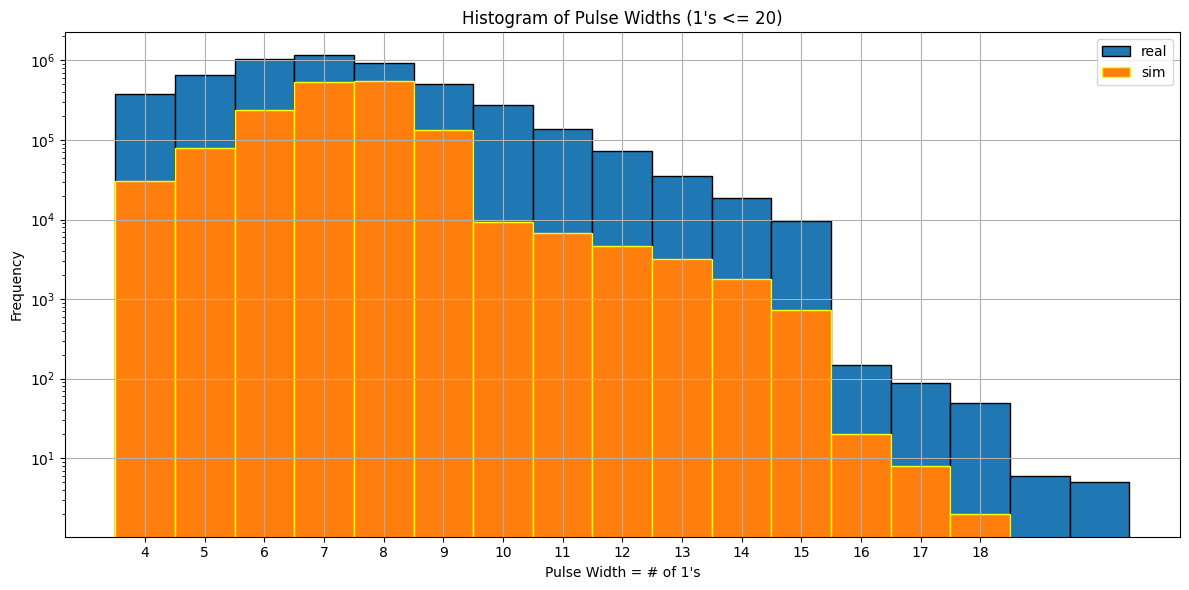

In [21]:
# Filter the data to keep only values <= 20
filtered_data_real = data_real[data_real['ones'] <= 20]

# Define the bin edges for the histogram
bin_edges_real = np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 2) - 0.5



# Filter the data to keep only values <= 74
filtered_data_sim = data_sim[data_sim['ones'] <= 20]

# Now you can proceed with the histogram plotting
plt.figure(figsize=(12, 6))

# Define the bin edges for the histogram
bin_edges_real = np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 2) - 0.5

# Plot the histogram
plt.hist(filtered_data_real['ones'], bins=bin_edges_real, edgecolor='black', log=True, label='real')

# Define the bin edges for the histogram
bin_edges_sim = np.arange(np.min(filtered_data_sim['ones']), np.max(filtered_data_sim['ones']) + 2) - 0.5

# Plot the histogram
plt.hist(filtered_data_sim['ones'], bins=bin_edges_sim, edgecolor='yellow', log=True, label='sim')

# Customize the plot
plt.title('Histogram of Pulse Widths (1\'s <= 20)')
plt.xlabel('Pulse Width = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(np.min(filtered_data_sim['ones']), np.max(filtered_data_sim['ones']) + 1))

# Save and show the plot
#plt.savefig('hist_presenta.png', dpi=1000)
plt.show()


## Datos uno arriba de otro normalizando por la cantidad de entradas

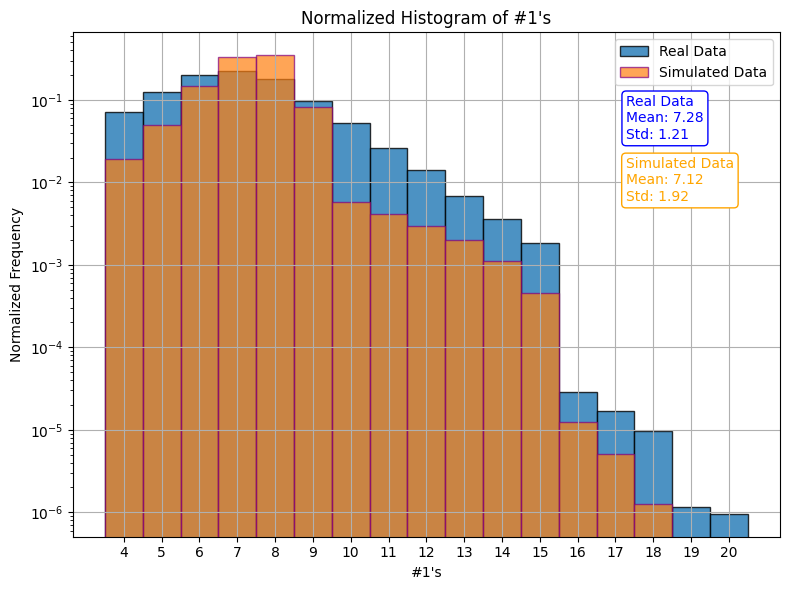

In [22]:
# Filter the data to keep only values <= 20
filtered_data_real = data_real[data_real['ones'] <= 20]
filtered_data_sim = data_sim[data_sim['ones'] <= 20]

# Calculate mean and standard deviation for real and simulated data
mean_real = filtered_data_real['ones'].mean()
std_real = filtered_data_real['ones'].std()

mean_sim = filtered_data_sim['ones'].mean()
std_sim = filtered_data_sim['ones'].std()

# Now you can proceed with the histogram plotting
plt.figure(figsize=(8, 6))

# Define the bin edges for the histogram
bin_edges = np.arange(3.5, 21.5, 1)  # Bins from 4 to 20

# Plot the histogram for real data, normalizing by the total number of entries
plt.hist(filtered_data_real['ones'], bins=bin_edges, edgecolor='black', log=True, 
         density=True, alpha=0.8, label='Real Data')

# Plot the histogram for simulated data, normalizing by the total number of entries
plt.hist(filtered_data_sim['ones'], bins=bin_edges, edgecolor='purple', log=True, 
         density=True, alpha=0.7, label='Simulated Data')

# Customize the plot
plt.title('Normalized Histogram of #1\'s')
plt.xlabel('#1\'s')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(4, 21, 1))

# Set a vertical position offset for the annotations
y_offset = 0.5

# Annotate mean and std for real data
plt.annotate(f'Simulated Data\nMean: {mean_real:.2f}\nStd: {std_real:.2f}', 
             xy=(mean_real+10.15, y_offset-0.494), 
             xycoords='data', 
             fontsize=10, 
             color='orange', 
             bbox=dict(boxstyle='round', fc='white', ec='orange', lw=1))

# Annotate mean and std for simulated data, adjusted position
plt.annotate(f'Real Data\nMean: {mean_sim:.2f}\nStd: {std_sim:.2f}', 
             xy=(mean_sim+10, y_offset-0.466),  # Move this up to avoid overlap
             xycoords='data', 
             fontsize=10, 
             color='blue', 
             bbox=dict(boxstyle='round', fc='white', ec='blue', lw=1))

# Save and show the plot
# plt.savefig('normalized_hist_presenta_with_stats.pdf', dpi=1000)
plt.show()


# Nueva tanda de analisis - Octubre

      Pulse Width (divided by 3.125 ns)
0                                   5.0
1                                   5.0
2                                   6.0
3                                   6.0
4                                   5.0
...                                 ...
3997                                4.0
3998                                3.0
3999                                4.0
4000                                5.0
4001                                5.0

[4002 rows x 1 columns]


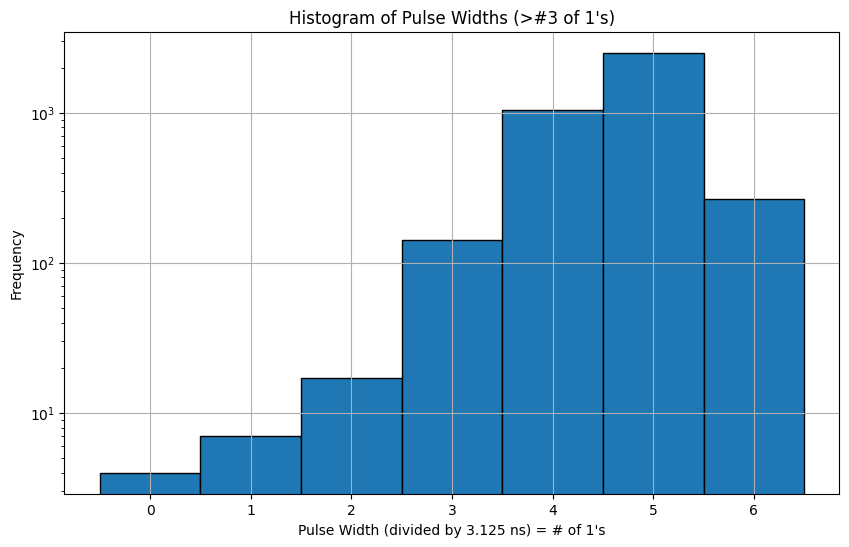

In [4]:
# Load data
df_muones_4000_v1 = pd.read_csv(r"C:\Users\Usuario\Documents\Labo_ITeDA_no_entra_en_git\Sims Grandes\Results\circuito_inversor_v1,5.txt", sep="\t")

# Convert relevant columns to numpy arrays for fast processing
time_array = df_muones_4000_v1['time'].values
vout_array = df_muones_4000_v1['V(out)'].values

# Define threshold and time divisor
threshold = 0.5  # 800mV threshold
time_divisor = 3.125e-9

# Call the numba-optimized function
pulse_widths_4000_v1 = compute_pulse_widths(time_array, vout_array, threshold, time_divisor)

# Convert to DataFrame
pulse_widths_df_muones_4000_v1 = pd.DataFrame(pulse_widths_4000_v1, columns=['Pulse Width (divided by 3.125 ns)'])

# Display result
print(pulse_widths_df_muones_4000_v1)


# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones_2000_update = pulse_widths_df_muones_2000_update[pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_4000_v1['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_4000_v1['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_4000_v1['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s) sim.v1')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_4000_v1['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_4000_v1['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

      Pulse Width (divided by 3.125 ns)
0                                   7.0
1                                   7.0
2                                   7.0
3                                   7.0
4                                   7.0
...                                 ...
3978                                5.0
3979                                3.0
3980                                4.0
3981                                6.0
3982                                6.0

[3983 rows x 1 columns]


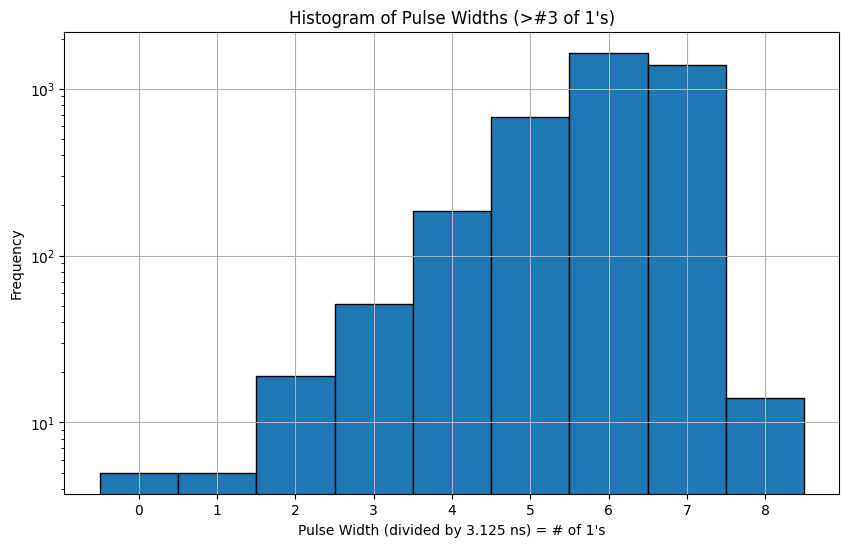

In [5]:
# Load data
df_muones_4000_v2 = pd.read_csv(r"C:\Users\Usuario\Documents\Labo_ITeDA_no_entra_en_git\Sims Grandes\Results\circuito_inversor_v2.txt", sep="\t")

# Convert relevant columns to numpy arrays for fast processing
time_array = df_muones_4000_v2['time'].values
vout_array = df_muones_4000_v2['V(out)'].values

# Define threshold and time divisor
threshold = 0.5  # 800mV threshold
time_divisor = 3.125e-9

# Call the numba-optimized function
pulse_widths_4000_v2 = compute_pulse_widths(time_array, vout_array, threshold, time_divisor)

# Convert to DataFrame
pulse_widths_df_muones_4000_v2 = pd.DataFrame(pulse_widths_4000_v2, columns=['Pulse Width (divided by 3.125 ns)'])

# Display result
print(pulse_widths_df_muones_4000_v2)


# Filter data to keep only values greater than 3
filtered_pulse_widths_df_muones_4000_v2 = pulse_widths_df_muones_2000_update[pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_4000_v2['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_4000_v2['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_4000_v2['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s) with sim.v2')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_4000_v2['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_4000_v2['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

      Pulse Width (divided by 3.125 ns)
0                                   4.0
1                                   4.0
2                                   4.0
3                                   4.0
4                                   4.0
...                                 ...
3676                                2.0
3677                                3.0
3678                                2.0
3679                                2.0
3680                                3.0

[3681 rows x 1 columns]


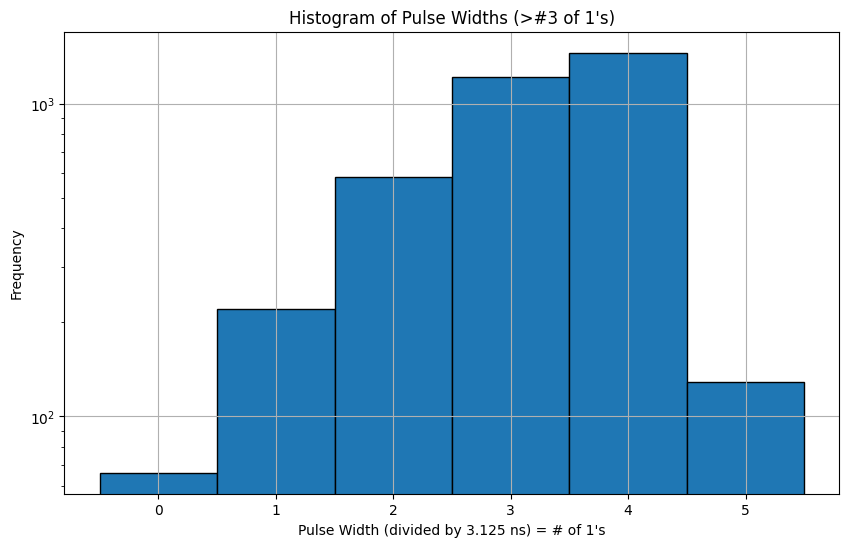

In [6]:
# Load data
df_muones_4000_actualizado = pd.read_csv(r"C:\Users\Usuario\Documents\Labo_ITeDA_no_entra_en_git\Sims Grandes\Results\circuito_inversor_actualizado.txt", sep="\t")

# Convert relevant columns to numpy arrays for fast processing
time_array = df_muones_4000_actualizado['time'].values
vout_array = df_muones_4000_actualizado['V(out)'].values

# Define threshold and time divisor
threshold = 0.5  # 800mV threshold
time_divisor = 3.125e-9

# Call the numba-optimized function
pulse_widths_4000_actualizado = compute_pulse_widths(time_array, vout_array, threshold, time_divisor)

# Convert to DataFrame
pulse_widths_df_muones_4000_actualizado = pd.DataFrame(pulse_widths_4000_actualizado, columns=['Pulse Width (divided by 3.125 ns)'])

# Display result
print(pulse_widths_df_muones_4000_actualizado)


# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones_2000_update = pulse_widths_df_muones_2000_update[pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_4000_actualizado['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_4000_actualizado['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_4000_actualizado['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s) with sim.v0')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_4000_actualizado['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_4000_actualizado['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

# Datos Finales

       Pulse Width (divided by 3.125 ns)
0                                    8.0
1                                    6.0
2                                    7.0
3                                    8.0
4                                    7.0
...                                  ...
99713                                4.0
99714                                4.0
99715                                5.0
99716                                5.0
99717                                6.0

[99718 rows x 1 columns]


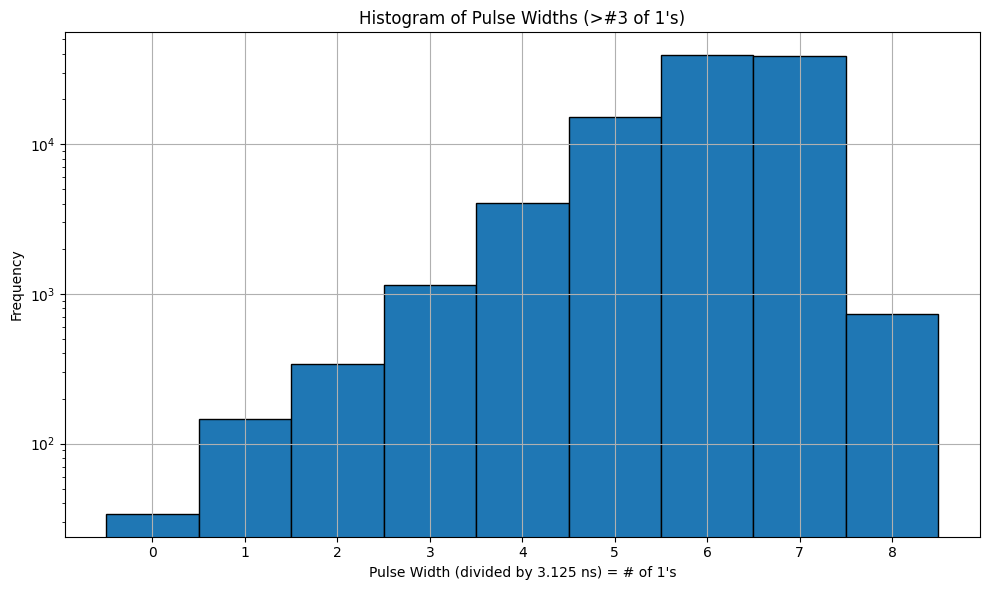

In [33]:
# Load data
df_muones_100k = pd.read_csv(r"C:\Users\Usuario\Documents\Labo_ITeDA_no_entra_en_git\Sim Final\bode_circuito_completo_con_capacitores_en_preamp_inversor_v2.txt", sep="\t")

# Convert relevant columns to numpy arrays for fast processing
time_array = df_muones_100k['time'].values
vout_array = df_muones_100k['V(out)'].values

# Define threshold and time divisor
threshold = 0.2  # 800mV threshold
time_divisor = 3.125e-9

# Call the numba-optimized function
pulse_widths_100k = compute_pulse_widths(time_array, vout_array, threshold, time_divisor)

# Convert to DataFrame
pulse_widths_df_muones_100k = pd.DataFrame(pulse_widths_100k, columns=['Pulse Width (divided by 3.125 ns)'])

# Display result
print(pulse_widths_df_muones_100k)


# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones_100k = pulse_widths_df_muones_2000_update[pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_100k['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_100k['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_100k['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_100k['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_100k['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.savefig('simulacion_unos_final.pdf', dpi=1000)
plt.show()

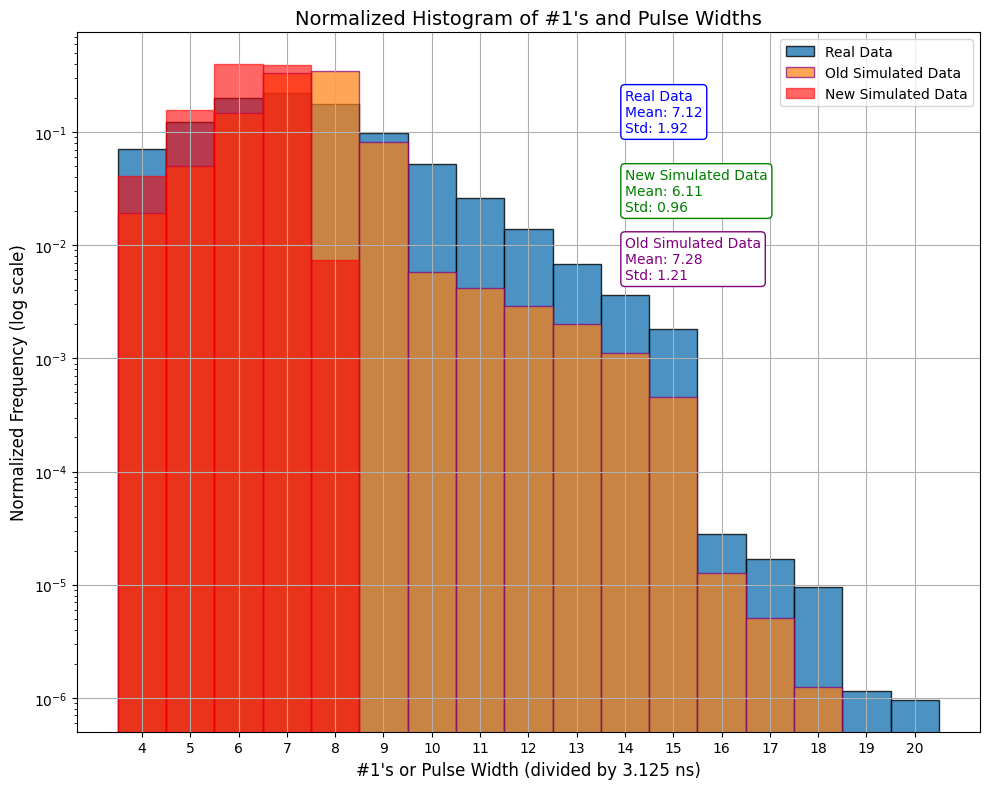

In [34]:
# --- First Dataset: Real and Simulated Data ---

# Ensure the 'ones' column is numeric for both datasets
data_real['ones'] = pd.to_numeric(data_real['ones'], errors='coerce')
data_sim['ones'] = pd.to_numeric(data_sim['ones'], errors='coerce')

# Filter data to keep only values <= 20
filtered_data_real = data_real[data_real['ones'] <= 20]
filtered_data_sim = data_sim[data_sim['ones'] <= 20]

# Calculate mean and standard deviation
mean_real = filtered_data_real['ones'].mean()
std_real = filtered_data_real['ones'].std()
mean_sim = filtered_data_sim['ones'].mean()
std_sim = filtered_data_sim['ones'].std()

# --- Second Dataset: Pulse Width Data ---

# Load pulse width data
df_muones_100k = pd.read_csv(
    r"C:\Users\Usuario\Documents\Labo_ITeDA_no_entra_en_git\Sim Final\bode_circuito_completo_con_capacitores_en_preamp_inversor_v2.txt", 
    sep="\t"
)

# Convert relevant columns to numpy arrays for fast processing
time_array = df_muones_100k['time'].values
vout_array = df_muones_100k['V(out)'].values

# Define threshold and time divisor
threshold = 0.2  # 800mV threshold
time_divisor = 3.125e-9

# Call the numba-optimized function (assume compute_pulse_widths is defined)
pulse_widths_100k = compute_pulse_widths(time_array, vout_array, threshold, time_divisor)

# Convert to DataFrame
pulse_widths_df_muones_100k = pd.DataFrame(
    pulse_widths_100k, 
    columns=['Pulse Width (divided by 3.125 ns)']
)

# Filter data to keep values <= 20
pulse_widths_filtered = pulse_widths_df_muones_100k[
    pulse_widths_df_muones_100k['Pulse Width (divided by 3.125 ns)'] <= 20
]

# Rename the column for consistency with the first two datasets
pulse_widths_filtered.rename(
    columns={'Pulse Width (divided by 3.125 ns)': 'ones'}, 
    inplace=True
)

# Calculate mean and standard deviation
mean_pulse_widths = pulse_widths_filtered['ones'].mean()
std_pulse_widths = pulse_widths_filtered['ones'].std()

# --- Combined Plot ---

plt.figure(figsize=(10, 8))

# Define bin edges
bin_edges = np.arange(3.5, 21.5, 1)  # Bins from 4 to 20

# Plot real data
plt.hist(
    filtered_data_real['ones'], 
    bins=bin_edges, 
    edgecolor='black', 
    log=True, 
    density=True, 
    alpha=0.8, 
    label='Real Data'
)

# Plot simulated data
plt.hist(
    filtered_data_sim['ones'], 
    bins=bin_edges, 
    edgecolor='purple', 
    log=True, 
    density=True, 
    alpha=0.7, 
    label='Old Simulated Data'
)

# Plot pulse widths
plt.hist(
    pulse_widths_filtered['ones'], 
    bins=bin_edges, 
    color='red',
    edgecolor='red', 
    log=True, 
    density=True, 
    alpha=0.6, 
    label='New Simulated Data'
)

# Customize the plot
plt.title('Normalized Histogram of #1\'s and Pulse Widths', fontsize=14)
plt.xlabel('#1\'s or Pulse Width (divided by 3.125 ns)', fontsize=12)
plt.ylabel('Normalized Frequency (log scale)', fontsize=12)
plt.grid(True)
plt.legend()

# Set x-axis ticks to unit numbers
bin_centers = np.arange(4, 21, 1)  # Centers of the bins
plt.xticks(bin_centers, labels=[str(int(x)) for x in bin_centers])

# Annotate mean and std for each dataset
plt.annotate(f'Real Data\nMean: {mean_real:.2f}\nStd: {std_real:.2f}', 
             xy=(14, 0.1), 
             fontsize=10, 
             color='blue', 
             bbox=dict(boxstyle='round', fc='white', ec='blue', lw=1))

plt.annotate(f'Old Simulated Data\nMean: {mean_sim:.2f}\nStd: {std_sim:.2f}', 
             xy=(14, 0.005), 
             fontsize=10, 
             color='purple', 
             bbox=dict(boxstyle='round', fc='white', ec='purple', lw=1))

plt.annotate(f'New Simulated Data\nMean: {mean_pulse_widths:.2f}\nStd: {std_pulse_widths:.2f}', 
             xy=(14, 0.02), 
             fontsize=10, 
             color='green', 
             bbox=dict(boxstyle='round', fc='white', ec='green', lw=1))

# Save and show the plot
plt.savefig('simulacion_unos_final_comparacion.pdf', dpi=1000)
plt.show()
